# **Análise sobre um conjunto de dados de pinguins**

- Nome do conjunto de dados: **Penguin size, clutch, and blood isotope dataset**.
- Dados retirados de: [Kaggle](https://www.kaggle.com/datasets/utkarshx27/penguin-size-clutch-and-blood-isotope-data)

## **Importações iniciais**

In [ ]:
from google.colab import files
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


## **Realizando a leitura do arquivo**

In [ ]:
# leitura de arquivo
uploaded = files.upload()

Saving penguins_raw.csv to penguins_raw.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['penguins_raw.csv']))

## **Explorando os dados do arquivo**

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Informações dos campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           344 non-null    int64  
 1   studyName            344 non-null    object 
 2   Sample Number        344 non-null    int64  
 3   Species              344 non-null    object 
 4   Region               344 non-null    object 
 5   Island               344 non-null    object 
 6   Stage                344 non-null    object 
 7   Individual ID        344 non-null    object 
 8   Clutch Completion    344 non-null    object 
 9   Date Egg             344 non-null    object 
 10  Culmen Length (mm)   342 non-null    float64
 11  Culmen Depth (mm)    342 non-null    float64
 12  Flipper Length (mm)  342 non-null    float64
 13  Body Mass (g)        342 non-null    float64
 14  Sex                  333 non-null    object 
 15  Delta 15 N (o/oo)    330 non-null    flo

In [ ]:
# Dimensão dos dados
print('Dimensão dos dados')
print(f'Linhas: {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Dimensão dos dados
Linhas: 344
Colunas: 18


In [ ]:
# visualizando 3 primeiros dados
df.head(3)

,Unnamed: 0,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,1,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,2,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,3,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


In [ ]:
# visualizando 3 ultimos dados
df.tail(3)

,Unnamed: 0,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
341,342,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,343,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN
343,344,PAL0910,68,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A2,Yes,2009-11-21,50.2,18.7,198.0,3775.0,FEMALE,9.39305,-24.25255,NaN


In [ ]:
# visualizando descrição dos dados
df.describe().round(2)

,Unnamed: 0,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.00,344.00,342.00,342.00,342.00,342.00,330.00,331.00
mean,172.50,63.15,43.92,17.15,200.92,4201.75,8.73,-25.69
std,99.45,40.43,5.46,1.97,14.06,801.95,0.55,0.79
min,1.00,1.00,32.10,13.10,172.00,2700.00,7.63,-27.02
25%,86.75,29.00,39.22,15.60,190.00,3550.00,8.30,-26.32
50%,172.50,58.00,44.45,17.30,197.00,4050.00,8.65,-25.83
75%,258.25,95.25,48.50,18.70,213.00,4750.00,9.17,-25.06
max,344.00,152.00,59.60,21.50,231.00,6300.00,10.03,-23.79


## **Analisando informações dos pinguins por territórios/ilhas**

- ### Mostrando a quantidade de espécies diferentes de pinguins em cada ilha

In [ ]:
# agrupando os dados por especie e ilha
group_especies = df.groupby(['Island', 'Species']).count()
# renomeando a coluna individual id para representar a quantidade de pinguim com especies diferentes por ilha
group_especies = group_especies.rename(columns={'Individual ID': 'Quantidade'})[['Quantidade']]
# visualizando resultado
group_especies

Quantidade
Island    Species                                              
Biscoe    Adelie Penguin (Pygoscelis adeliae)                44
          Gentoo penguin (Pygoscelis papua)                 124
Dream     Adelie Penguin (Pygoscelis adeliae)                56
          Chinstrap penguin (Pygoscelis antarctica)          68
Torgersen Adelie Penguin (Pygoscelis adeliae)                52

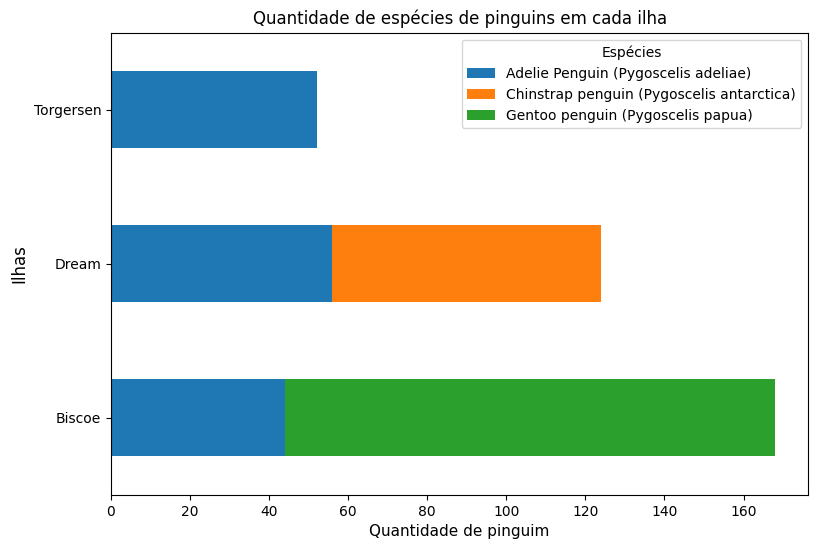

In [ ]:
# Cria uma tabela resumida dos dados anterior, separando as especies em colunas diferentes
table_especies = pd.pivot_table(group_especies, values='Quantidade', index=['Island'], columns=['Species'], fill_value=0)

# Cria um gráfico mostrando as especies de cada ilha
ax = table_especies.plot.barh(stacked=True, figsize=(9, 6))
# Nomeia informações do gráfico
ax.set_title('Quantidade de espécies de pinguins em cada ilha')
ax.set_xlabel('Quantidade de pinguim', size=11)
ax.set_ylabel('Ilhas', size=12)
ax.legend(title='Espécies')

# Mostrando as separações das espécies por ilhas
plt.show()

- ### Mostrando a quantidade de pinguins machos e fêmeas em cada ilha

In [ ]:
# agrupando os dados por especie e sexo do pinguim
group_sex = df.groupby(['Island', 'Sex']).count()
# renomeando a coluna individual id para representar a quantidade de pinguim com especies diferentes por ilha
group_sex = group_sex.rename(columns={'Individual ID': 'Quantidade'})[['Quantidade']]
# visualizando dados
group_sex 

Quantidade
Island    Sex               
Biscoe    FEMALE          80
          MALE            83
Dream     FEMALE          61
          MALE            62
Torgersen FEMALE          24
          MALE            23

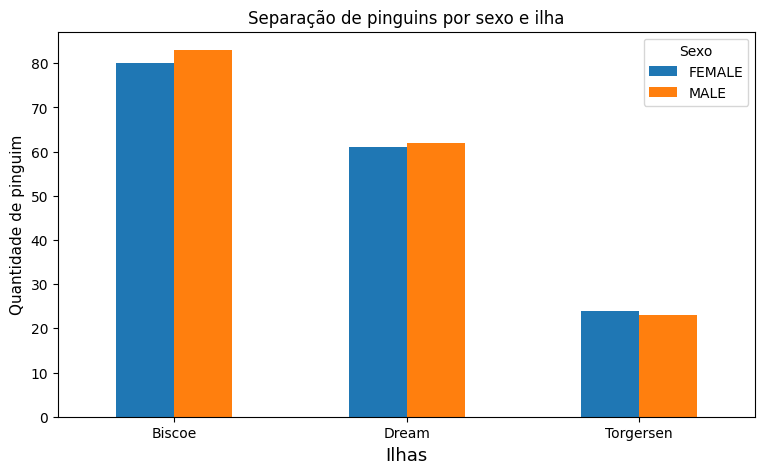

In [ ]:
# Cria uma tabela resumida dos dados anterior, separando o sexo em colunas diferentes
table_sex = pd.pivot_table(group_sex, values='Quantidade', index=['Island'], columns=['Sex'], fill_value=0)

# Cria um gráfico mostrando as quantidades de pinguins com sexo diferente em cada ilha
ax = table_sex.plot.bar(figsize=(9, 5))
# Nomeia informações do gráfico
ax.set_title('Separação de pinguins por sexo e ilha')
ax.set_xlabel('Ilhas', size=13)
ax.set_ylabel('Quantidade de pinguim', size=11)
ax.legend(title='Sexo')
plt.xticks(rotation=0)

# Mostrando o gráfico
plt.show()

## **Analisando dados fisícos sobre os pinguins**

- ### Visualizando informações sobre os pesos

In [ ]:
# Mostrando informações sobre os pesos
media_total = df['Body Mass (g)'].mean().round(2)
maior_peso = df['Body Mass (g)'].max().round(2)
menor_peso = df['Body Mass (g)'].min().round(2)

media_peso_masculino = df.loc[(df['Sex'] == 'MALE')]['Body Mass (g)'].mean().round(2)
maior_peso_masculino = df.loc[(df['Sex'] == 'MALE')]['Body Mass (g)'].max().round(2)
menor_peso_masculino = df.loc[(df['Sex'] == 'MALE')]['Body Mass (g)'].min().round(2)

media_peso_feminino = df.loc[(df['Sex'] == 'FEMALE')]['Body Mass (g)'].mean().round(2)
maior_peso_feminino = df.loc[(df['Sex'] == 'FEMALE')]['Body Mass (g)'].max().round(2)
menor_peso_feminino = df.loc[(df['Sex'] == 'FEMALE')]['Body Mass (g)'].min().round(2)

print('Informações gerais sobre o peso dos pinguins:')
print(f'- Media do peso total: {media_total} g')
print(f'- Maior peso encontrado: {maior_peso} g')
print(f'- Menor peso encontrado: {menor_peso} g')
print('\n--------------------------------------------\n')
print('Informações sobre o peso de pinguins machos:')
print(f'- Media do peso total: {media_peso_masculino} g')
print(f'- Maior peso encontrado: {maior_peso_masculino} g')
print(f'- Menor peso encontrado: {menor_peso_masculino} g')
print('\n--------------------------------------------\n')
print('Informações sobre o peso de pinguins femêas:')
print(f'- Media do peso total: {media_peso_feminino} g')
print(f'- Maior peso encontrado: {maior_peso_feminino} g')
print(f'- Menor peso encontrado: {menor_peso_feminino} g')

Informações gerais sobre o peso dos pinguins:
- Media do peso total: 4201.75 g
- Maior peso encontrado: 6300.0 g
- Menor peso encontrado: 2700.0 g

--------------------------------------------

Informações sobre o peso de pinguins machos:
- Media do peso total: 4545.68 g
- Maior peso encontrado: 6300.0 g
- Menor peso encontrado: 3250.0 g

--------------------------------------------

Informações sobre o peso de pinguins femêas:
- Media do peso total: 3862.27 g
- Maior peso encontrado: 5200.0 g
- Menor peso encontrado: 2700.0 g


- ### Mostrando informações sobre o comprimento das nadadeiras dos pinguins

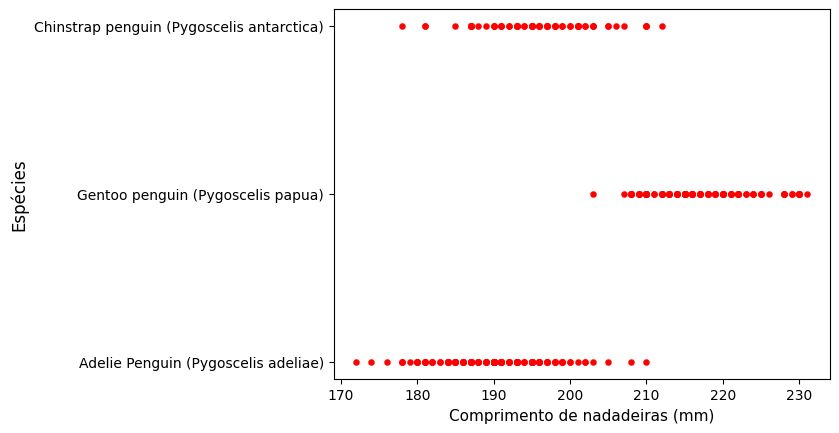

In [ ]:
# Visualizando comprimentos das nadadeiras das espécies de pinguins
ax = df.plot(kind='scatter', x='Flipper Length (mm)', y='Species', color='r', linewidth=.2)

ax.set_xlabel('Comprimento de nadadeiras (mm)', size=11)
ax.set_ylabel('Espécies', size=12)

plt.show()


- ### Mostrando informações sobre o comprimento dos bicos dos pinguins

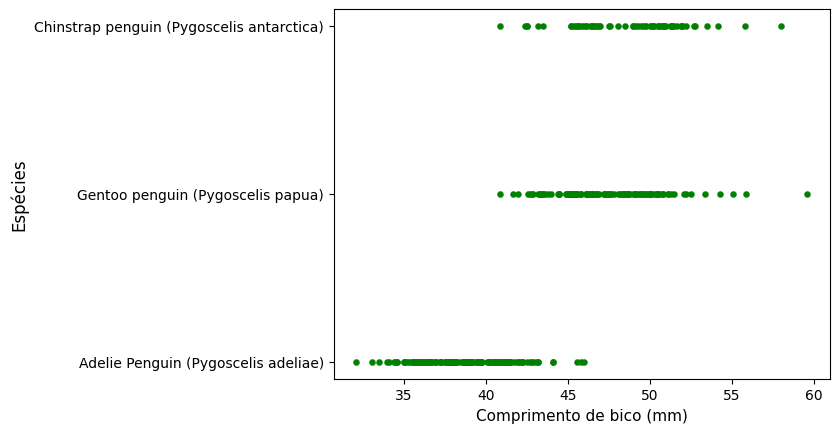

In [ ]:
# Visualizando comprimentos dos bicos das espécies de pinguins
ax = df.plot(kind='scatter', x='Culmen Length (mm)', y='Species', color='g', linewidth=.2)

ax.set_xlabel('Comprimento de bico (mm)', size=11)
ax.set_ylabel('Espécies', size=12)

plt.show()

- ### Mostrando média do peso dos sexos em cada espécie de pinguim

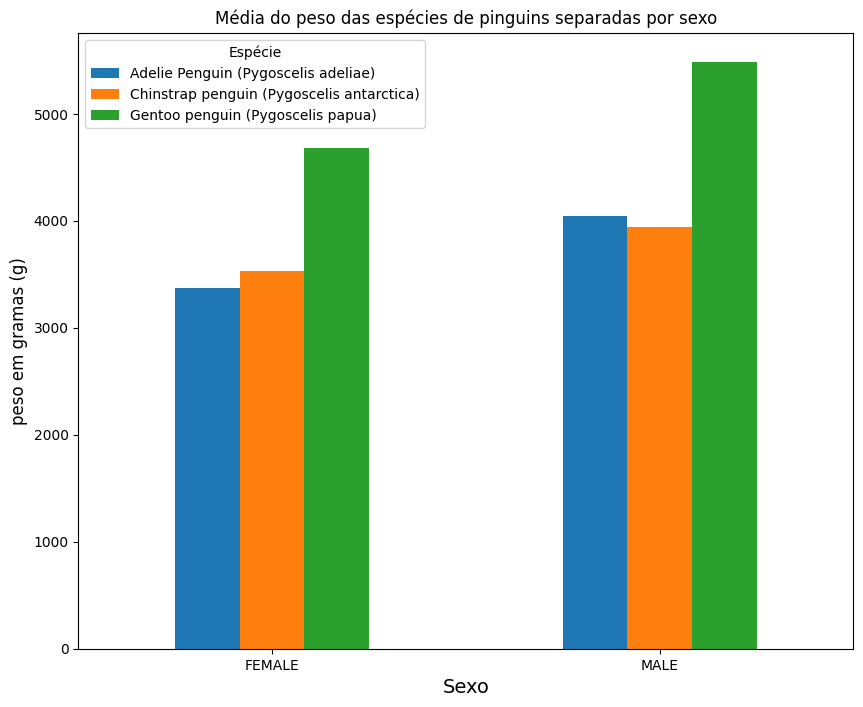

In [ ]:
# agrupando dados pela especie e sexo e definindo a média dos campos
group_especies_sex = df.groupby(['Species', 'Sex']).mean().round(2)

# renomeando a coluna Body Mass (g) da tabela para a média encontrada anteriormente
group_especies_sex = group_especies_sex.rename(columns={'Body Mass (g)': 'Média de peso'})[['Média de peso']]

# Cria uma tabela resumida dos dados anterior, separando o sexo em colunas diferentes
table_especies_sex = pd.pivot_table(group_especies_sex, values='Média de peso', index=['Sex'], columns=['Species'], fill_value=0)

# Gerando gráfico para visualizar a média de espécies de pinguins pelo sexo
ax = table_especies_sex.plot.bar(figsize=(10, 8))

ax.set_title('Média do peso das espécies de pinguins separadas por sexo')
ax.set_xlabel('Sexo', size=14)
ax.set_ylabel('peso em gramas (g)', size=12)
ax.legend(title='Espécie')
plt.xticks(rotation=0)

plt.show()

- ### Mostrando gráfico temporal sobre o perído de ovos de cada espécie de pinguim

In [ ]:
# Agrupando dados pela data do ovo de cada espécie e contando os dados
group_resume = df.groupby(['Date Egg', 'Species'], as_index=False).count()

# Selecionando apenas as principais e renomeando a contagem do individual id pra representar a quantidade
group_resume = group_resume[['Date Egg', 'Species', 'Individual ID']].rename(columns={'Individual ID': 'Quantidade'})

# Transformando os dados em horários
group_resume['Date Egg'] = pd.to_datetime(group_resume['Date Egg'])

# Selecionando as diferentes espécies
especies = group_resume['Species'].unique()

# Visualizando espécies:
print(f'Quantidade de espécies: {len(especies)}')
for especie in especies:
  print(f'- {especie}')

Quantidade de espécies: 3
- Adelie Penguin (Pygoscelis adeliae)
- Gentoo penguin (Pygoscelis papua)
- Chinstrap penguin (Pygoscelis antarctica)


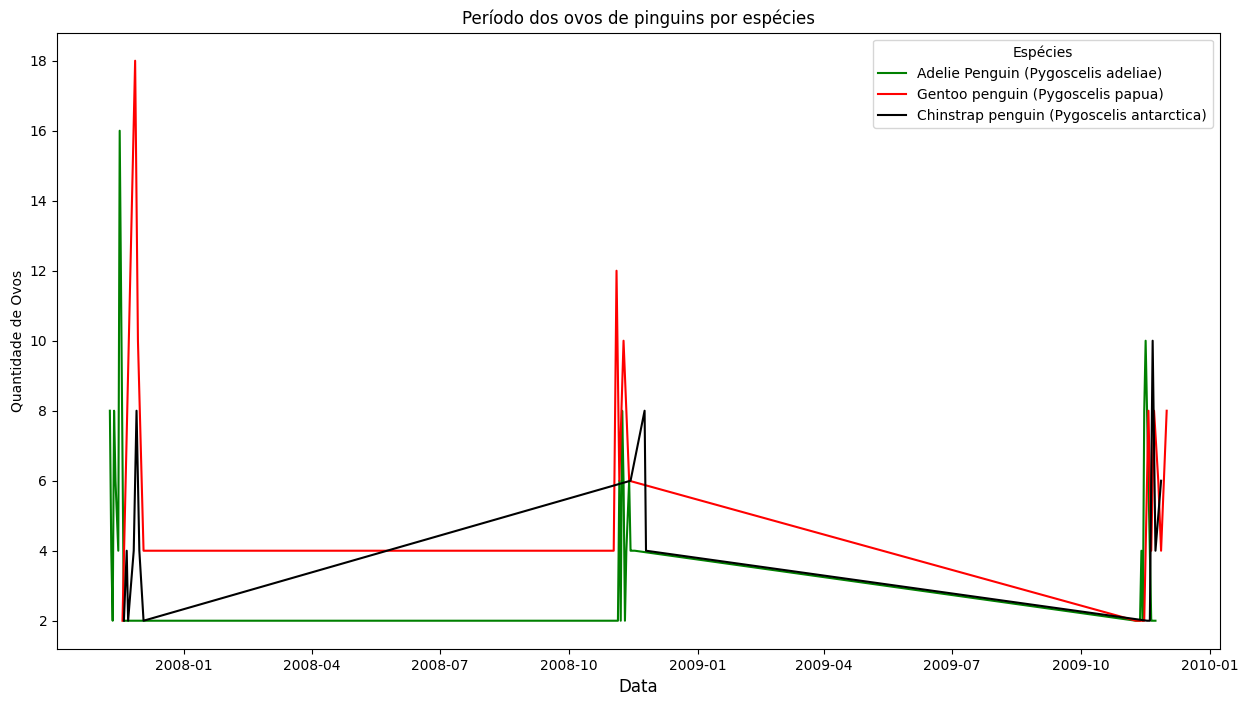

In [ ]:
# Definindo cores que vão representar cada espécie:
cores = ('green', 'red', 'black')

# Iniciar a figura do gráfico
fig, ax = plt.subplots(figsize=(15, 8))

# percorendo as especies e gerando o gráfico para cada espécie com base na quantidade de ovo da data
for especie, cor in zip(especies, cores):
    especies_data = group_resume[group_resume['Species'] == especie]
    ax.plot(especies_data['Date Egg'], especies_data['Quantidade'], label=especie, color=cor)

# Configurar os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Data', size=12)
ax.set_ylabel('Quantidade de Ovos')
ax.set_title('Período dos ovos de pinguins por espécies')

# Adicionar uma legenda
ax.legend(title='Espécies')

# Exibir o gráfico
plt.show()
